In [24]:
import MDAnalysis as mda
from MDAnalysis.lib import distances
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.interpolate import make_interp_spline, BSpline


# Calculate the center of mass for TRP rings
def compute_ring_coms(u, trp):
    coms = np.array([[u.atoms.select_atoms(f'(resname TRP and resid {id} and name C1 N1 C2 C3 C4 C5 C6 C7 C8)').center_of_mass()] for id in trp.residues.resids])
    return coms

# Distance between two centers of mass
def compute_distance(pos1, pos2, box_length):
    
    delta = pos1 - pos2
    
    delta_x = delta[0]
    delta_y = delta[1]
    delta_z = delta[2]
    
    delta_x -= (round(delta_x/box_length[0])) * box_length[0]
    delta_y -= (round(delta_y/box_length[1])) * box_length[1]
    delta_z -= (round(delta_z/box_length[2])) * box_length[2]
    
    return np.linalg.norm([delta_x, delta_y, delta_z])

# Angle between two vectors using dot product
def compute_angle(vec1, vec2):
    cos_theta = np.dot(vec1, vec2)
    return np.degrees(np.arccos(np.clip(cos_theta, -1, 1)))

# Cross product of two vectors
def compute_cross_product(vec1, vec2):
    return np.cross(vec1, vec2)/np.linalg.norm(np.cross(vec1, vec2))

# Vectors for C1-C4 and C1-C5 for angle calculation
def compute_vectors(trp_res):
    C1 = trp_res.atoms.select_atoms("name C1").positions[0]
    C4 = trp_res.atoms.select_atoms("name C4").positions[0]
    C5 = trp_res.atoms.select_atoms("name C5").positions[0]
    
    vector_C1_C4 = C4 - C1
    vector_C1_C5 = C5 - C1
    return vector_C1_C4, vector_C1_C5

def smooth(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y, k=2)
    return x_new, y_smooth(x_new)

edges = np.histogram([-1], 180, range=(0, 180))[1]
bins = 0.5 * (edges[:-1] + edges[1:])


In [ ]:
u = mda.Universe("md_0_sim_resp_24trp_500ns.tpr", "md_0_sim_resp_24trp_500ns_pbc_center.xtc")
trp = u.select_atoms("resname TRP")


frac_herinbone, frac_parallel, frac_perpendicular = [], [], []
for ts in u.trajectory[5000:]:
    angles = []
    coms = compute_ring_coms(u, trp)
    n_rings = len(coms)

    for i in range(0, n_rings-1):
        for j in range(i + 1, n_rings):
            dist = compute_distance(coms[i][0], coms[j][0], u.dimensions[:3])
            # distances.append(dist)
            if dist <= 6.5:  # Distance cutoff 5.5 Å for π-π stacking
                # Vectors for the two indole rings
                vector_C1_C4_1, vector_C1_C5_1 = compute_vectors(trp.residues[i])
                vector_C1_C4_2, vector_C1_C5_2 = compute_vectors(trp.residues[j])
                
                # cross_product1 = compute_cross_product(vector_C1_C4_1, vector_C1_C4_2)
                cross_product1 = compute_cross_product(vector_C1_C4_1, vector_C1_C5_1)
                cross_product2 = compute_cross_product(vector_C1_C4_2, vector_C1_C5_2)
                
                
                # angle = compute_angle(vector_C1_C4_1, vector_C1_C4_2)
                angle = compute_angle(cross_product1, cross_product2)
                angles.append(angle)
    
    count_angle_herinbone = 0
    count_angle_parallel = 0
    count_angle_perpendicular = 0
    for i in angles:
        if 30 <= i <= 60 or 120 <= i <= 150 :
            count_angle_herinbone += 1
        elif 0 <= i <= 30 or 150 <= i <= 180 :
            count_angle_parallel += 1
        else:
            count_angle_perpendicular += 1
    total_herinbone += count_angle_herinbone
    total_parallel += count_angle_parallel
    total_perpendicular += count_angle_perpendicular
    frac_herinbone.append(count_angle_herinbone/len(angles) if len(angles) > 0 else 0)
    frac_parallel.append(count_angle_parallel/len(angles) if len(angles) > 0 else 0)
    frac_perpendicular.append(count_angle_perpendicular/len(angles) if len(angles) > 0 else 0)
    
print(np.mean(frac_herinbone), np.mean(frac_parallel), np.mean(frac_perpendicular))


10124 4700 6902
10124 4700 6902
10125 4700 6902
10125 4700 6904
10126 4700 6904
10126 4701 6905
10126 4701 6905
10126 4701 6905
10126 4702 6905
10127 4702 6905
10127 4702 6905
10128 4702 6905
10130 4702 6905
10131 4702 6905
10133 4702 6905
10133 4702 6905
10134 4703 6905
10136 4703 6907
10137 4703 6910
10137 4704 6912
10138 4705 6912
10139 4705 6913
10141 4706 6913
10141 4708 6914
10142 4710 6914
10143 4711 6917
10146 4712 6917
10148 4713 6919
10150 4713 6921
10151 4714 6921
10152 4714 6922
10154 4714 6923
10156 4714 6923
10157 4715 6923
10159 4715 6923
10160 4715 6924
10161 4715 6925
10161 4717 6925
10162 4717 6926
10166 4717 6926
10166 4718 6927
10166 4719 6928
10168 4720 6928
10168 4720 6929
10169 4721 6929
10171 4723 6929
10172 4723 6931
10173 4724 6931
10174 4724 6932
10175 4726 6932
10178 4727 6932
10180 4728 6935
10181 4729 6936
10183 4729 6937
10183 4732 6937
10184 4733 6939
10185 4733 6939
10186 4735 6940
10186 4736 6940
10186 4737 6940
10186 4738 6941
10187 4739 6941
10190 47

KeyboardInterrupt: 

In [23]:

#TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr' 
#XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'

TPR = 'md_0_sim_resp_24trp-1mnt_500ns.tpr' 
XTC = 'md_0_sim_resp_24trp-1mnt_500ns_pbc_center.xtc'

#TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr' 
#XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and Tannic acids
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname MNT")


#final_angles = []
angles_m1 = []
for ts in u.trajectory[5000:]:  
    #angles = []
    trp_coms = [trp.atoms.select_atoms(f'resid {i}').center_of_mass() for i in trp.residues.resids]
    ta_coms = ta.center_of_mass()
    #print(trp_coms, ta_coms)

    # Calculate distances from TA to all TRPs
    dist1 = [compute_distance(i, ta_coms, u.dimensions[:3]) for i in trp_coms]
    # Identify TRPs outside the cutoff (12 Å)
    cutoff_1 = 12 #12
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    #print(len(outside_trps_idxs))
    coms = compute_ring_coms(u, trp)
    
    if (len(outside_trps_idxs) >= 2):
        for i in outside_trps_idxs:
            for j in outside_trps_idxs:
                if j > i:
                    dist = compute_distance(coms[i][0], coms[j][0], u.dimensions[:3])
                    # distances.append(dist)
                    if dist <= 6.5:  # Distance cutoff 5.5 Å for π-π stacking
                        # Vectors for the two indole rings
                        vector_C1_C4_1, vector_C1_C5_1 = compute_vectors(trp.residues[i])
                        vector_C1_C4_2, vector_C1_C5_2 = compute_vectors(trp.residues[j])
                
                        # cross_product1 = compute_cross_product(vector_C1_C4_1, vector_C1_C4_2)
                        cross_product1 = compute_cross_product(vector_C1_C4_1, vector_C1_C5_1)
                        cross_product2 = compute_cross_product(vector_C1_C4_2, vector_C1_C5_2)

                        # dot_product = np.dot(vector_C1_C4_1, vector_C1_C4_2)
                        # dot_product = np.dot(cross_product1, cross_product2)
                
                
                        # angle = compute_angle(vector_C1_C4_1, vector_C1_C4_2)
                        angle = compute_angle(cross_product1, cross_product2)
                        angles_m1.append(angle)
                        
    #if len(angles) > 0:
        #angle_hist = np.histogram(angles, 180, range=(0, 180))[0]
        #final_angles.append(angle_hist)

#df_angle = pd.DataFrame(final_angles)
#avg_final_angles_t1 = df_angle.mean(axis=0)

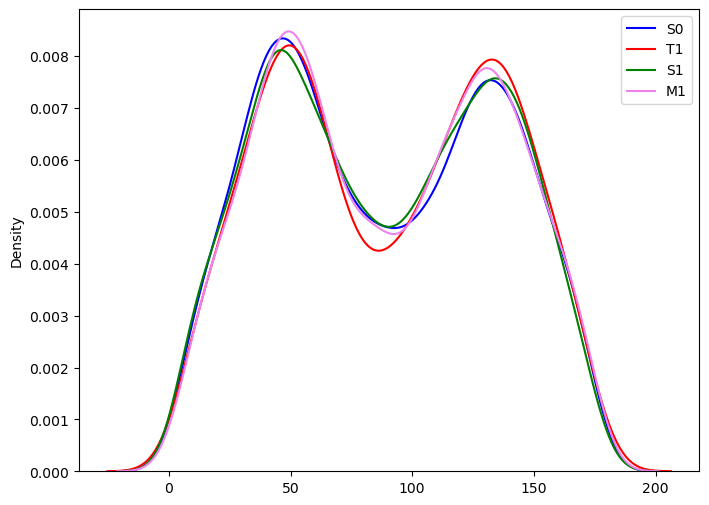

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(angles_s0, color='blue', label='S0', ax=ax)
sns.kdeplot(angles_t1, color='red', label='T1', ax=ax)
sns.kdeplot(angles_s1, color='green', label='S1', ax=ax)
sns.kdeplot(angles_m1, color='violet', label='M1', ax=ax)
ax.legend()
plt.savefig('angle_histogram.png', dpi=500, bbox_inches='tight')

In [39]:
frac_angle = 0
for i in angles_m1:
    #if 30 <= i <= 60 or 120 <= i <= 150 :
    #if 0 <= i <= 30 or 150 <= i <= 180 :
    if 60 <= i <= 120:
        frac_angle += 1
frac_angle /= 276
print(frac_angle)

12.41304347826087
